In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import numpy as np

In [2]:
vgg16_model = VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))

In [3]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# 搭建全连接层
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(8,activation='softmax'))

model = Sequential()
model.add(vgg16_model)
model.add(top_model)

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
sequential (Sequential)      (None, 8)                 6424840   
Total params: 21,139,528
Trainable params: 21,139,528
Non-trainable params: 0
_________________________________________________________________


In [6]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,     # 随机旋转度数
    width_shift_range = 0.2, # 随机水平平移
    height_shift_range = 0.2,# 随机竖直平移
    rescale = 1/255,         # 数据归一化
    shear_range = 20,       # 随机错切变换
    zoom_range = 0.2,        # 随机放大
    horizontal_flip = True,  # 水平翻转
    fill_mode = 'nearest',   # 填充方式
) 

test_datagen = ImageDataGenerator(
    rescale = 1/255,         # 数据归一化
) 

In [7]:
batch_size = 32

# 生成训练数据
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(224,224),
    batch_size=batch_size,
    )

# 测试数据
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(224,224),
    batch_size=batch_size,
    )

Found 287 images belonging to 8 classes.
Found 74 images belonging to 8 classes.


In [8]:
train_generator.class_indices

{'冰雹': 0, '尘卷风': 1, '日柱': 2, '虹': 3, '闪电': 4, '雪': 5, '雾': 6, '霜': 7}

In [9]:
# 定义优化器，代价函数，训练过程中计算准确率
model.compile(optimizer=SGD(lr=1e-3,momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=40,validation_data=test_generator,validation_steps=len(test_generator))

W0810 14:00:24.125189 4670811584 deprecation.py:323] From <ipython-input-9-49299978fa01>:4: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/40
9/9 [==============================] - 202s 22s/step - loss: 2.4002 - accuracy: 0.1254 - val_loss: 2.0863 - val_accuracy: 0.2432
Epoch 2/40
9/9 [==============================] - 150s 17s/step - loss: 1.9698 - accuracy: 0.2439 - val_loss: 1.6354 - val_accuracy: 0.3378
Epoch 3/40
9/9 [==============================] - 216s 24s/step - loss: 1.7693 - accuracy: 0.2544 - val_loss: 1.5149 - val_accuracy: 0.4459
Epoch 4/40
9/9 [==============================] - 242s 27s/step - loss: 1.6643 - accuracy: 0.2857 - val_loss: 1.4538 - val_accuracy: 0.4054
Epoch 5/40
9/9 [==============================] - 251s 28s/step - loss: 1.4409 - accuracy: 0.4390 - val_loss: 1.4004 - val_accuracy: 0.5405
Epoch 6/40
9/9 [==============================] - 250s 28s/step - loss: 1.2993 - accuracy: 0.4948 - val_loss: 1.0850 - val_accuracy: 0.5946
Epoch 7/40
4/9 [============>.................] - ETA: 1:53 - loss: 1.2211 - accuracy: 0.5547

KeyboardInterrupt: 

In [10]:
# pip install h5py
model.save('model_vgg16.h5')

# 测试

In [11]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

label = train_generator.class_indices
label = dict(zip(label.values(),label.keys()))

# 载入模型
# model = load_model('model_vgg16.h5')

def predict(image):
    # 导入图片
    image = load_img(image)
    plt.imshow(image)
    plt.show()
    image = image.resize((224,224))
    image = img_to_array(image)
    image = image/255
    # (1,224,224,3)
    image = np.expand_dims(image,0)
    
    return model.predict_classes(image)[0] 


Using TensorFlow backend.


In [12]:
label

{0: '冰雹', 1: '尘卷风', 2: '日柱', 3: '虹', 4: '闪电', 5: '雪', 6: '雾', 7: '霜'}

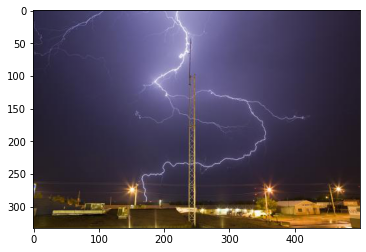

W0810 14:28:46.130830 4670811584 deprecation.py:323] From <ipython-input-11-9bb6f371c607>:22: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


闪电


In [13]:
pre = predict('data/test/闪电/u=1910309642,1420354939&fm=200&gp=0.jpg')
print(label[pre])

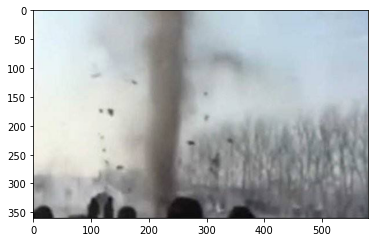

雾


In [14]:
pre = predict('data/test/尘卷风/timg.jpg')
print(label[pre])